In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('FinancialData.csv',names=['Sentiment','News Headline'])
data.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.shape

(4846, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
data.isnull().sum()

Sentiment        0
News Headline    0
dtype: int64

In [7]:
data.dtypes

Sentiment        object
News Headline    object
dtype: object

In [8]:
data.describe

<bound method NDFrame.describe of      Sentiment                                      News Headline
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]>

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

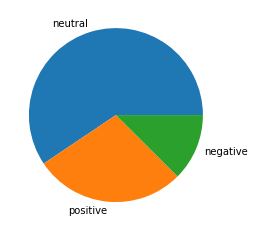

In [10]:
mylabels=['neutral','positive','negative']
plt.pie(data.Sentiment.value_counts(),labels=mylabels)
plt.show()

In [11]:
features=data.iloc[:,:-1].values
labels=data.iloc[:,0].values

In [12]:
import re
processed_features = []
for sentence in range(0, len(features)):
    processed_feature=re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature=re.sub(r'\s+[a-zA-Z_0-9]\s+', ' ', processed_feature)
    processed_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature=re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature=re.sub(r'^b\s+', '', processed_feature)
    processed_feature=processed_feature.lower()
    processed_features.append(processed_feature)

In [13]:
processed_features[:4]

[' neutral ', ' neutral ', ' negative ', ' positive ']

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_features=vectorizer.fit_transform(processed_features).toarray()

In [15]:
max(processed_features[2].tolist())

1.0

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(processed_features,labels,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred=rfc.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       121
     neutral       1.00      1.00      1.00       571
    positive       1.00      1.00      1.00       278

    accuracy                           1.00       970
   macro avg       1.00      1.00      1.00       970
weighted avg       1.00      1.00      1.00       970



<AxesSubplot:>

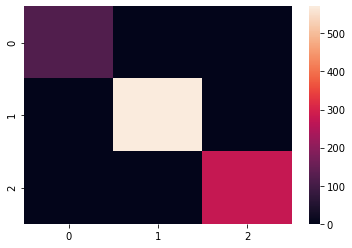

In [21]:
import seaborn as sb
sb.heatmap(confusion_matrix(y_test,y_pred))

In [22]:
import pickle

In [23]:
pickle.dump(rfc,open('sentimentnlp.pkl','wb'))